In [ ]:
install.packages("igraph")
library('igraph')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



p:  0.003  mean:  3.034 var:  2.781626

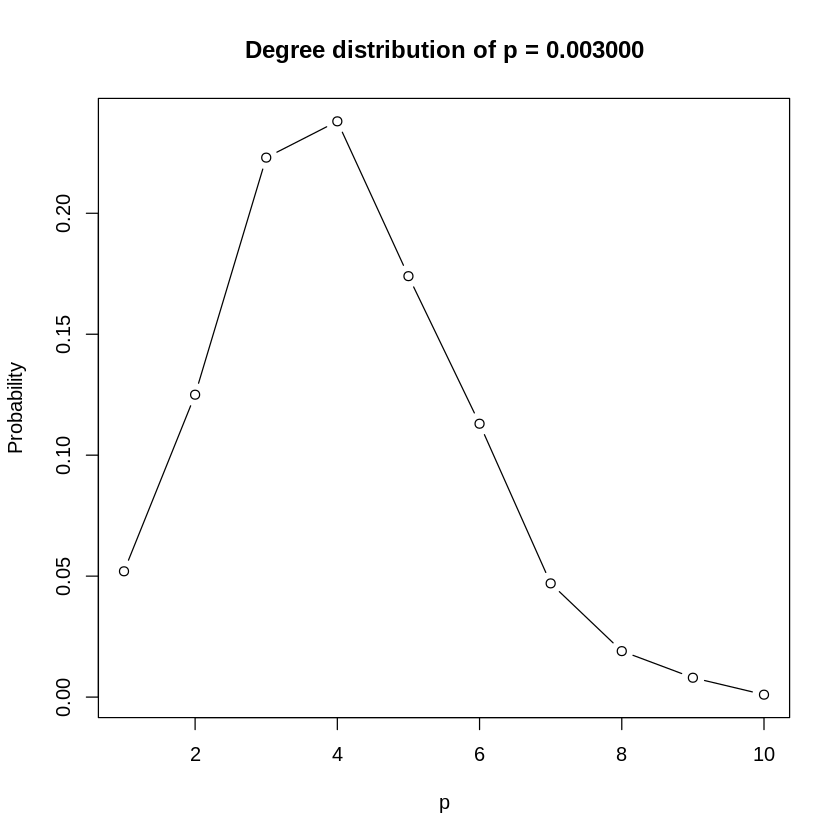

p:  0.004  mean:  4.06 var:  4.216617

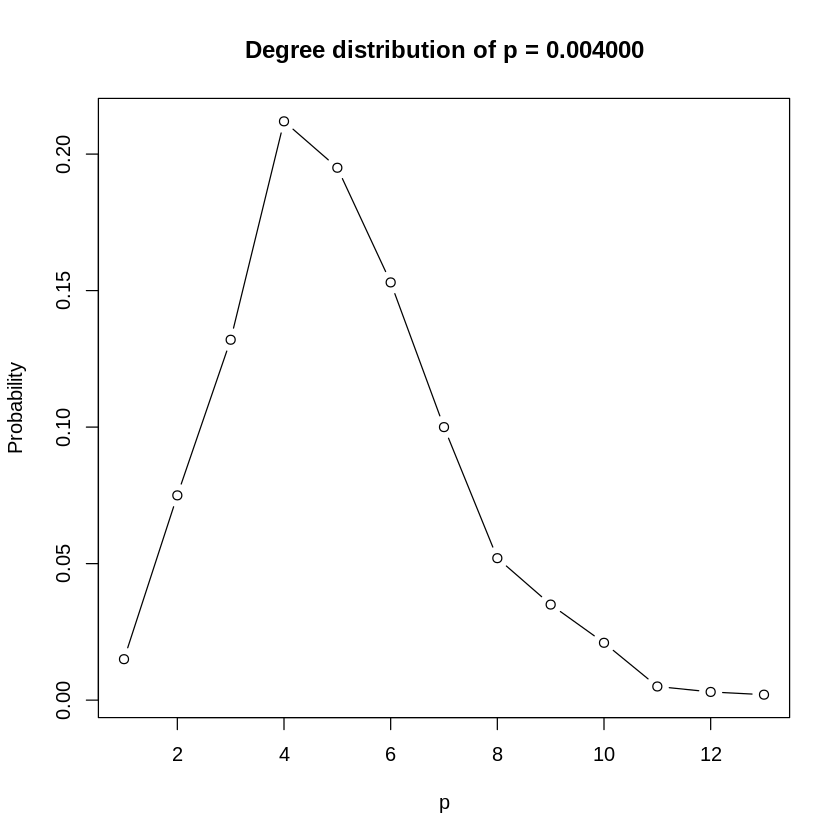

p:  0.01  mean:  10.072 var:  10.19501

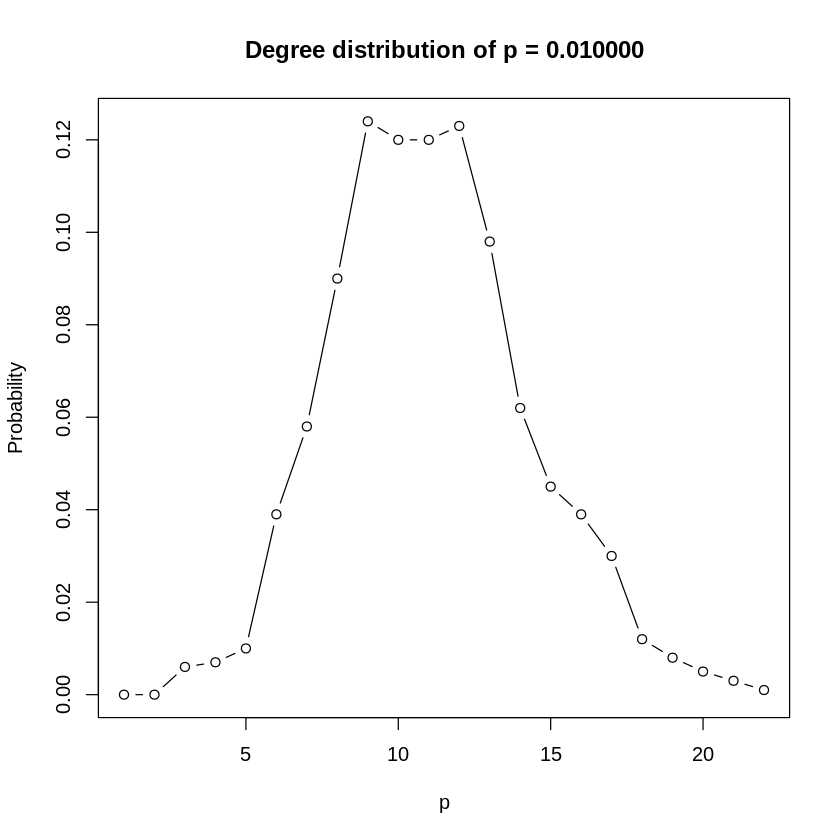

p:  0.05  mean:  50.23 var:  51.68679

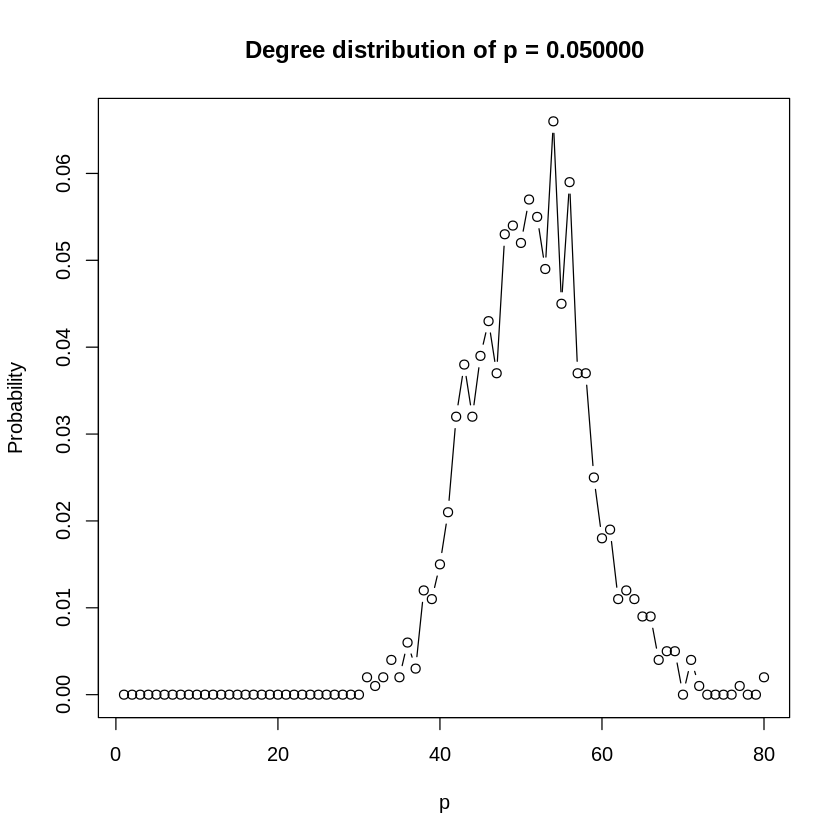

p:  0.1  mean:  99.908 var:  87.40294

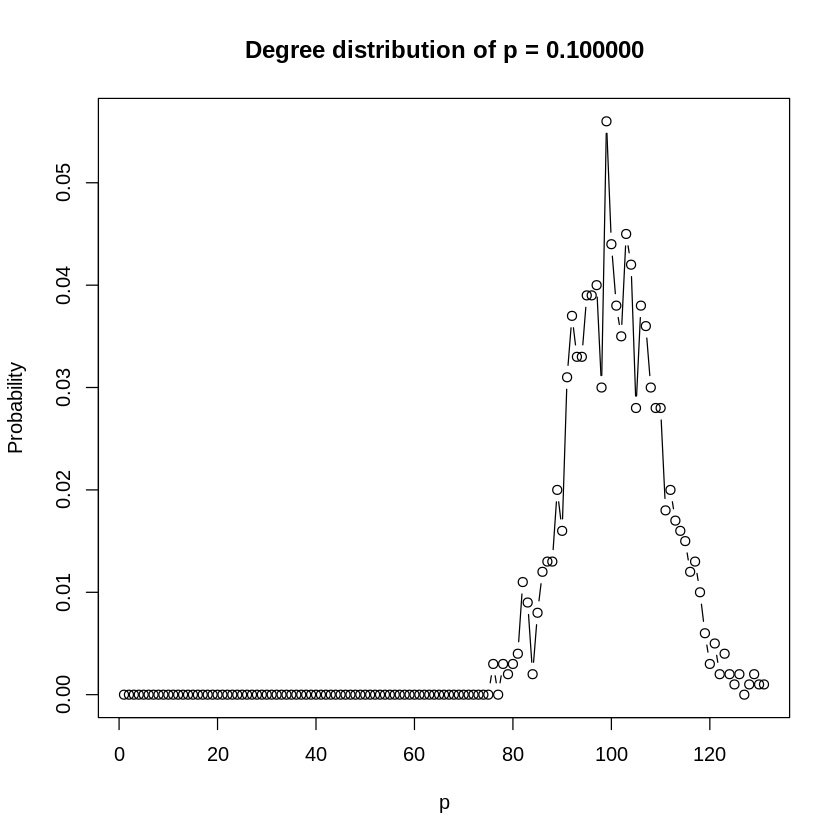

In [135]:
# Question 1.1a

p_vec <- c(0.003, 0.004, 0.01, 0.05, 0.1)
for (p in p_vec) {
  g <- sample_gnp(1000, p)
  plot(degree.distribution(g), main=sprintf("Degree distribution of p = %f", p), xlab = "p", ylab = "Probability", type = "b")
  cat("p: ", p, " mean: ", mean(degree(g)), "var: ", var(degree(g)))
}

In [156]:
# Question 1.1b
p_vec <- c(0.003, 0.004, 0.01, 0.05, 0.1)
for (p in p_vec) {
  counter <- 0
  diameter <- 0
  for (i in 1:10000) {
    g <- sample_gnp(1000, p)
    counter <- counter + is.connected(g)
  }
  cat("p: ", p, " probability is connected: ", counter/10000, "%")

  if (counter != 10000) {
    while (is.connected(g)) {
      g <- sample_gnp(1000, p) 
    } 
    cluster <- clusters(g)
    gcc <-induced.subgraph(g, which(cluster$membership==which.max(cluster$csize)))
    cat(" nodes: ", vcount(gcc), " edges: ", ecount(gcc), " diameter: ", diameter(gcc))
  }
  print("")
}



p:  0.003  probability is connected:  0 % nodes:  937  edges:  1493  diameter:  15[1] ""
p:  0.004  probability is connected:  0 % nodes:  974  edges:  2011  diameter:  11[1] ""
p:  0.01  probability is connected:  0.9556 % nodes:  999  edges:  5028  diameter:  6[1] ""
p:  0.05  probability is connected:  1 %[1] ""
p:  0.1  probability is connected:  1 %[1] ""


In [ ]:
# Question 1.1c

p_vec <- seq(0,0.008,0.0002)
x <- c()
y <- c()
x_avg <- c()
y_avg <- c()
for (p in p_vec) {
  sum <- 0
  for (i in 1:100) {
    g <- sample_gnp(1000, p)
    cluster <- clusters(g)
    gcc_size <- max(cluster$csize) / 1000
    x <- c(x, p)
    y <- c(y, gcc_size)
    sum <- sum + gcc_size
  }
  x_avg <- c(x_avg, p)
  y_avg <- c(y_avg, sum/100)
}


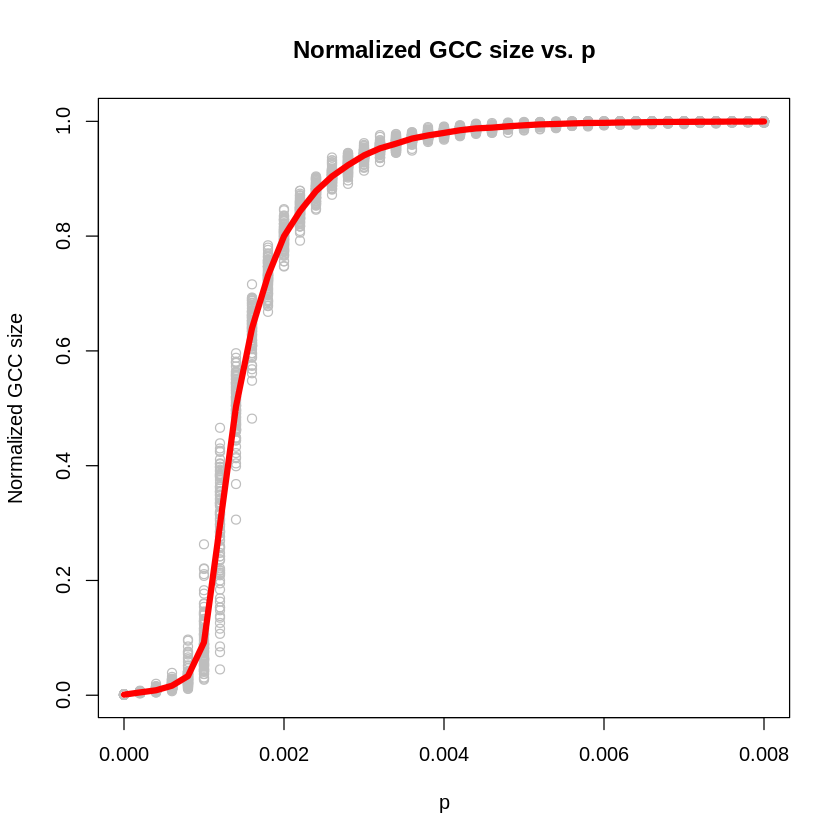

In [ ]:
plot(x, y, col="gray", xlab = "p", ylab = "Normalized GCC size", main = "Normalized GCC size vs. p")
lines(x_avg, y_avg, col="red", lwd=5.0)

In [ ]:
x_avg
y_avg

[1] 0.0000 0.0002 0.0004 0.0006 0.0008 0.0010 0.0012 0.0014 0.0016 0.0018
[11] 0.0020 0.0022 0.0024 0.0026 0.0028 0.0030 0.0032 0.0034 0.0036 0.0038
[21] 0.0040 0.0042 0.0044 0.0046 0.0048 0.0050 0.0052 0.0054 0.0056 0.0058
[31] 0.0060 0.0062 0.0064 0.0066 0.0068 0.0070 0.0072 0.0074 0.0076 0.0078
[41] 0.0080

[1] 0.00100 0.00494 0.00864 0.01662 0.03345 0.09219 0.29711 0.50303 0.63956
[10] 0.73096 0.79981 0.84340 0.87843 0.90412 0.92365 0.94070 0.95295 0.96110
[19] 0.96998 0.97549 0.97987 0.98448 0.98770 0.98900 0.99137 0.99308 0.99465
[28] 0.99540 0.99639 0.99719 0.99732 0.99798 0.99826 0.99866 0.99901 0.99904
[37] 0.99926 0.99935 0.99957 0.99956 0.99962

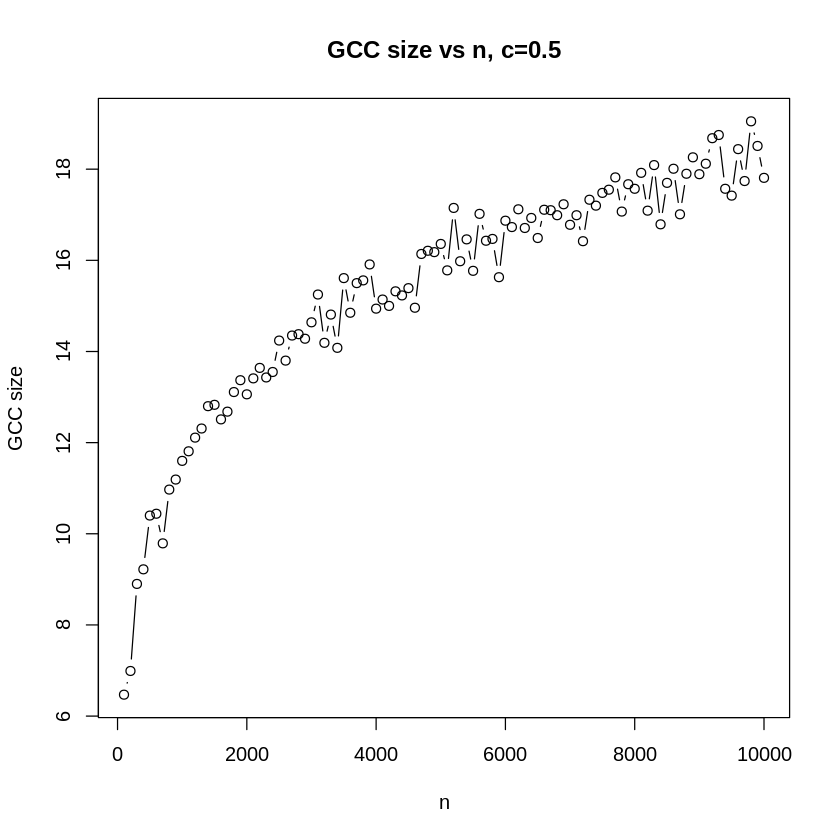

In [136]:
# Question 1.1d

c <- 0.5
n_vec <- seq(100,10000,100)
gcc_sizes <- c()
for (n in n_vec) {
  sum <- 0
  for (i in 1:100) {
    p <- c/n
    g <- sample_gnp(n, p)
    cluster <- clusters(g)
    gcc_size <- max(cluster$csize)
    sum <- sum + gcc_size
  }
  gcc_sizes <- c(gcc_sizes, sum/100)
}
plot(n_vec, gcc_sizes, main="GCC size vs n, c=0.5", xlab = "n", ylab = "GCC size", type = "b")


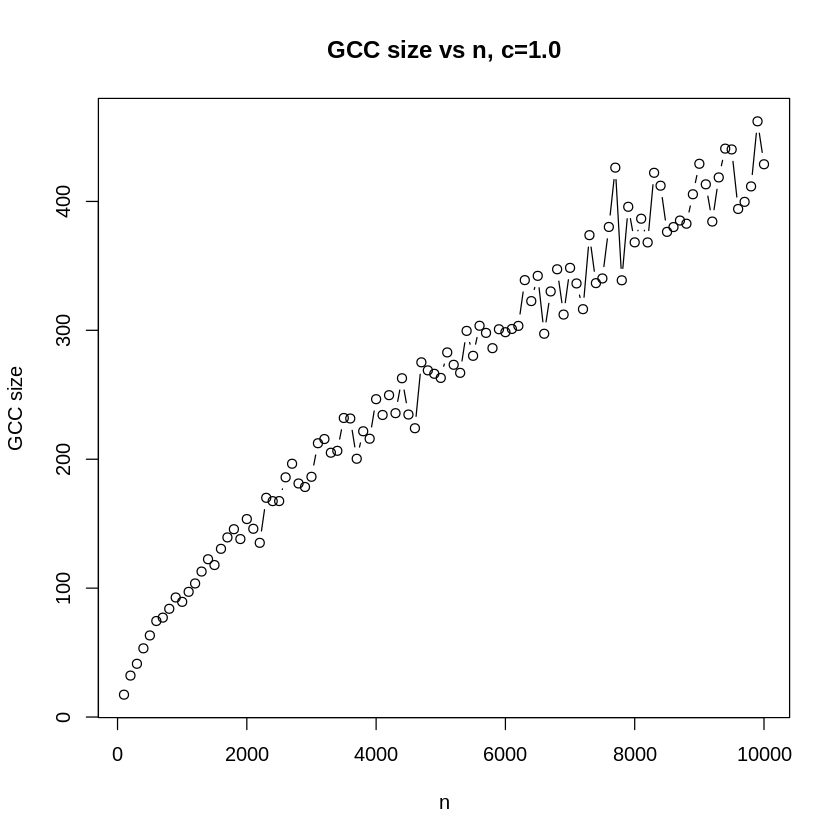

In [137]:
c <- 1
n_vec <- seq(100,10000,100)
gcc_sizes <- c()
for (n in n_vec) {
  sum <- 0
  for (i in 1:100) {
    p <- c/n
    g <- sample_gnp(n, p)
    cluster <- clusters(g)
    gcc_size <- max(cluster$csize)
    sum <- sum + gcc_size
  }
  gcc_sizes <- c(gcc_sizes, sum/100)
}
plot(n_vec, gcc_sizes, main="GCC size vs n, c=1.0", xlab = "n", ylab = "GCC size", type = "b")


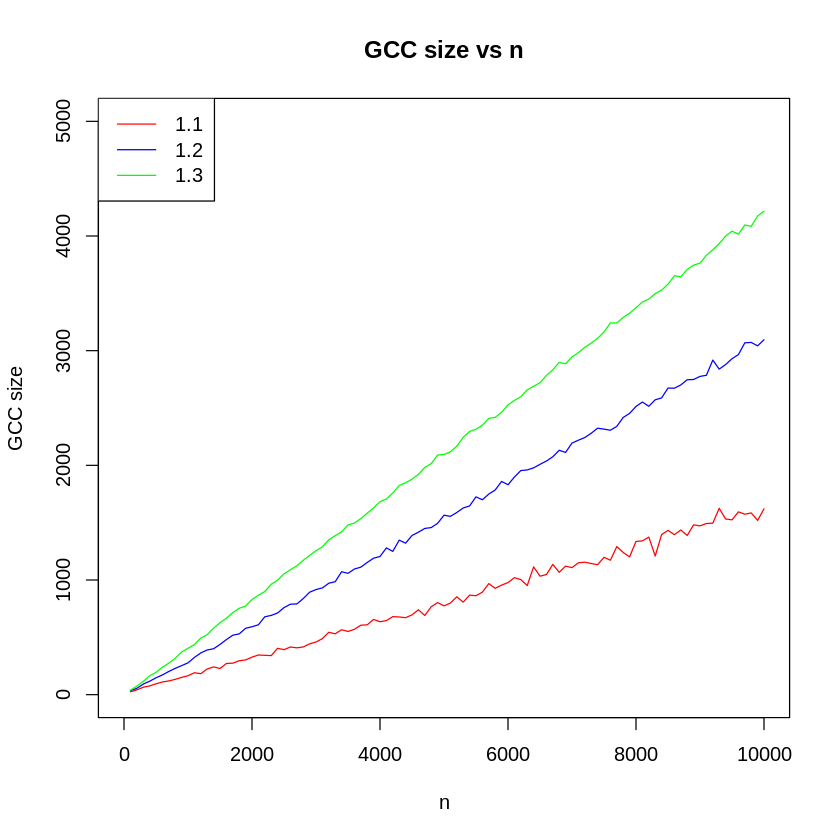

In [ ]:
.c_vec <- c(1.1, 1.2, 1.3)
colors <- c("red", "blue", "green")
n_vec <- seq(100,10000,100)
plot(NULL,xlim=c(0,10000), ylim=c(0,5000), main="GCC size vs n", xlab = "n", ylab = "GCC size")
for (i in 1:3) {
  gcc_sizes <- c()
  for (n in n_vec) {
    sum <- 0
    for (j in 1:100) {
      p <- c_vec[i]/n
      g <- sample_gnp(n, p)
      cluster <- clusters(g)
      gcc_size <- max(cluster$csize)
      sum <- sum + gcc_size
    }
    gcc_sizes <- c(gcc_sizes, sum/100)
  }
  lines(n_vec, gcc_sizes, col=colors[i])
}
legend("topleft",legend=c_vec, col=colors, lty=c(1,1,1))


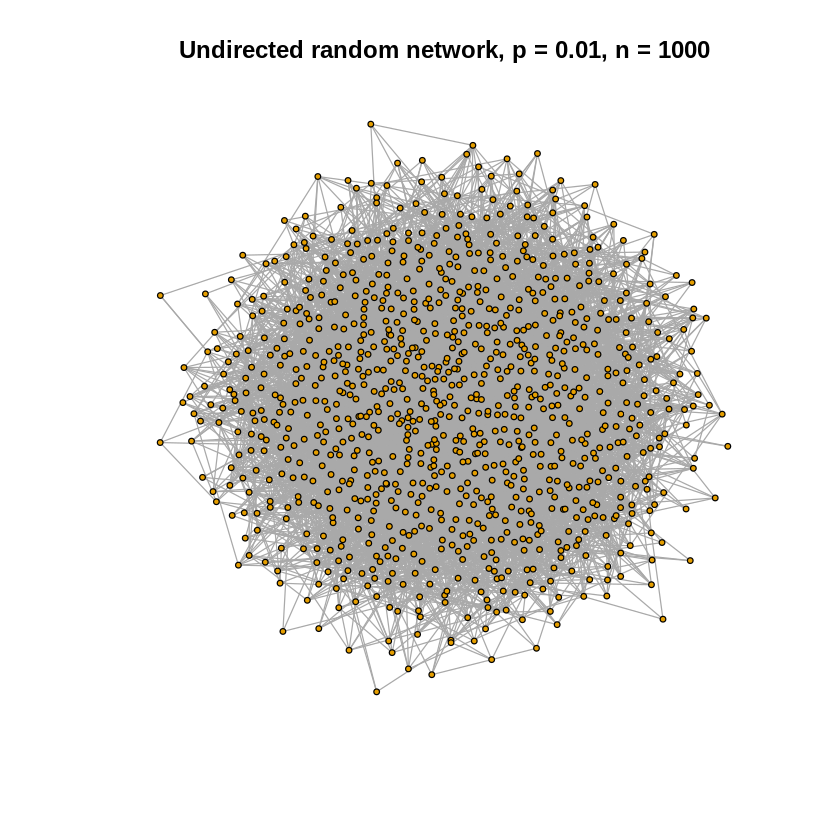

In [ ]:
# Question 2.1a

g <- sample_gnp(1000, 0.01)
plot(g, vertex.label=NA, vertex.size=2, main = "Undirected random network, p = 0.01, n = 1000")

In [147]:
# Question 2.1b
distances <- c()
degrees <- c()

for (i in 1:1000) {
  g <- sample_gnp(1000, 0.005) 
  cluster <- clusters(g)
  gcc <-induced.subgraph(g, which(cluster$membership==which.max(cluster$csize)))
  nodes = random_walk(gcc, steps=50, sample(V(gcc), 1))
  distances <- c(distances, shortest.paths(gcc, nodes, nodes[1]))
  degrees <- c(degrees, degree(gcc, nodes[length(nodes)]))
}

In [148]:
arr <- array(distances, dim=c(50,1000))

In [149]:
means <- c()
vars <- c()
for (i in 1:50) {
  row <- arr[i,]
  means <- c(means, mean(row))
  vars <- c(vars, var(row))
}

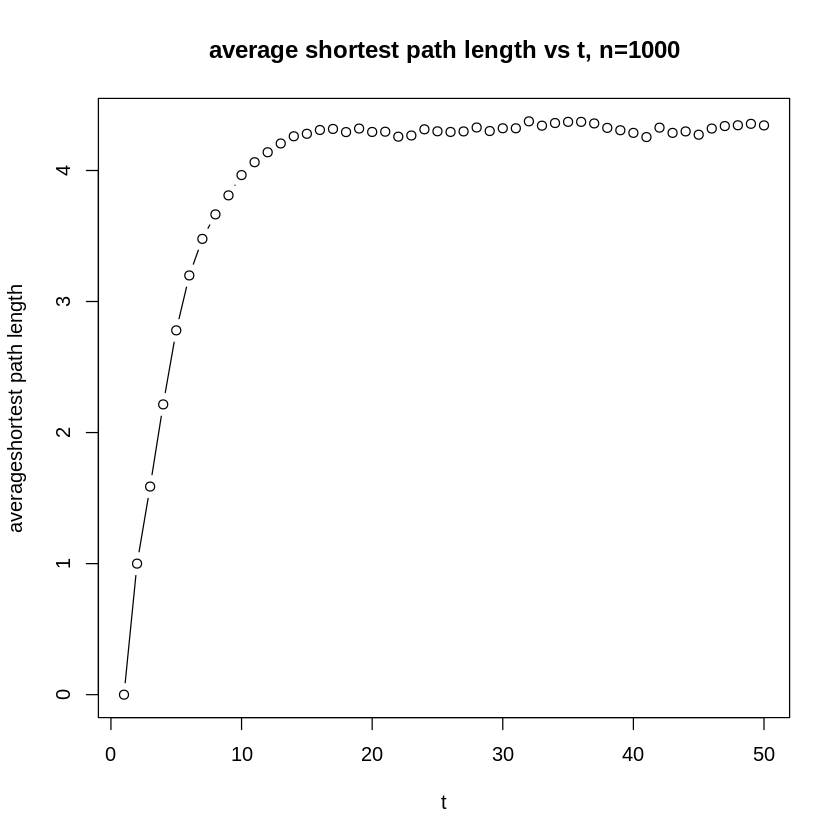

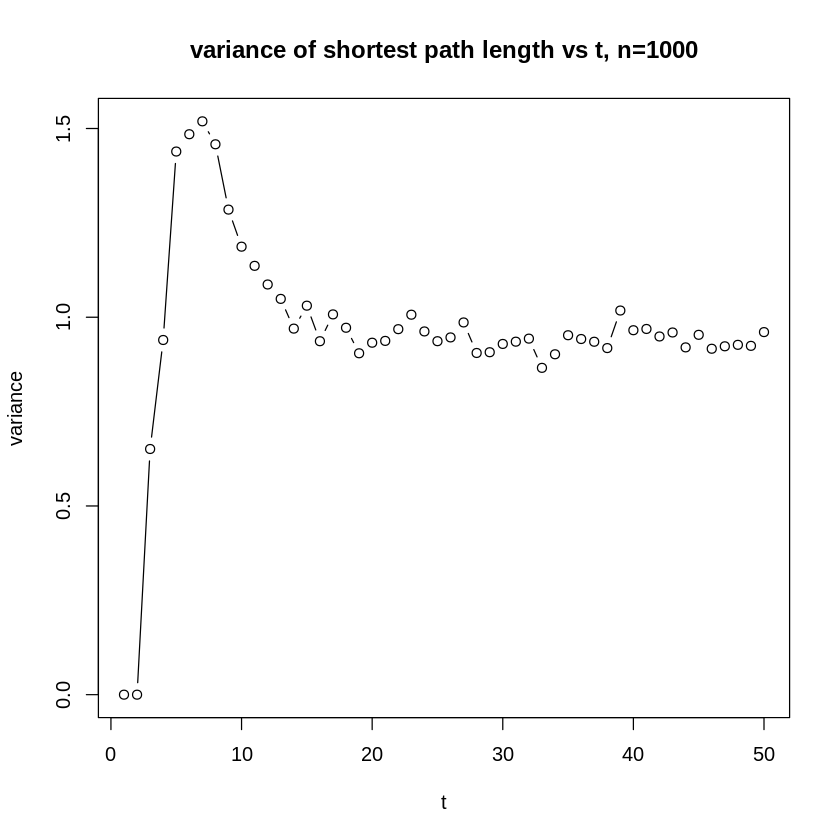

In [150]:
plot(1:50, means, main="average shortest path length vs t, n=1000", xlab="t", ylab="averageshortest path length", type = "b")
plot(1:50, vars,  main="variance of shortest path length vs t, n=1000", xlab="t", ylab="variance", type = "b")


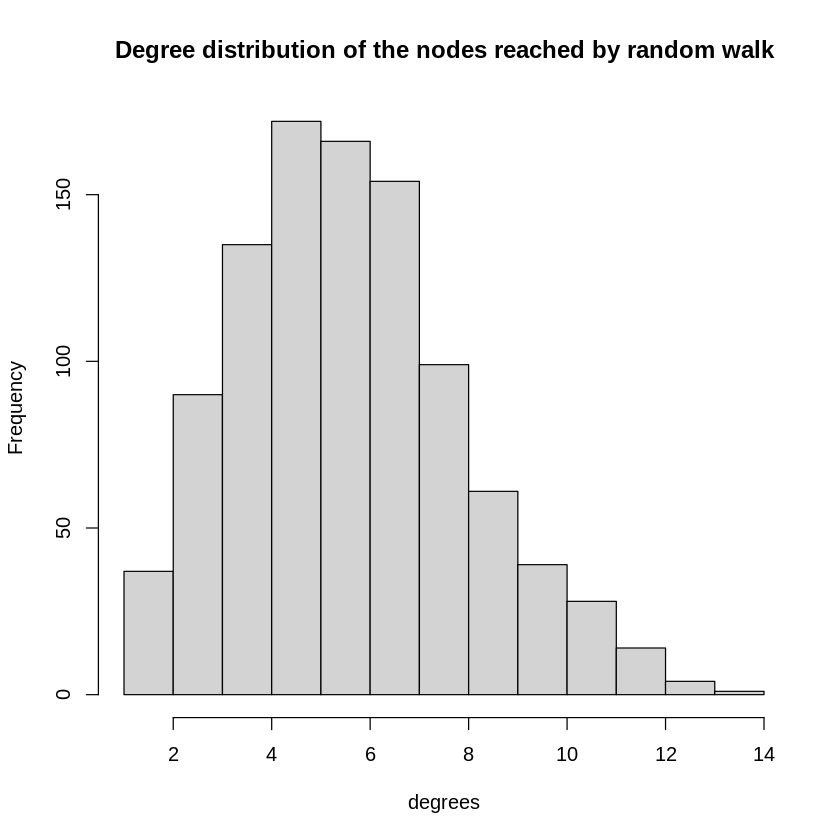

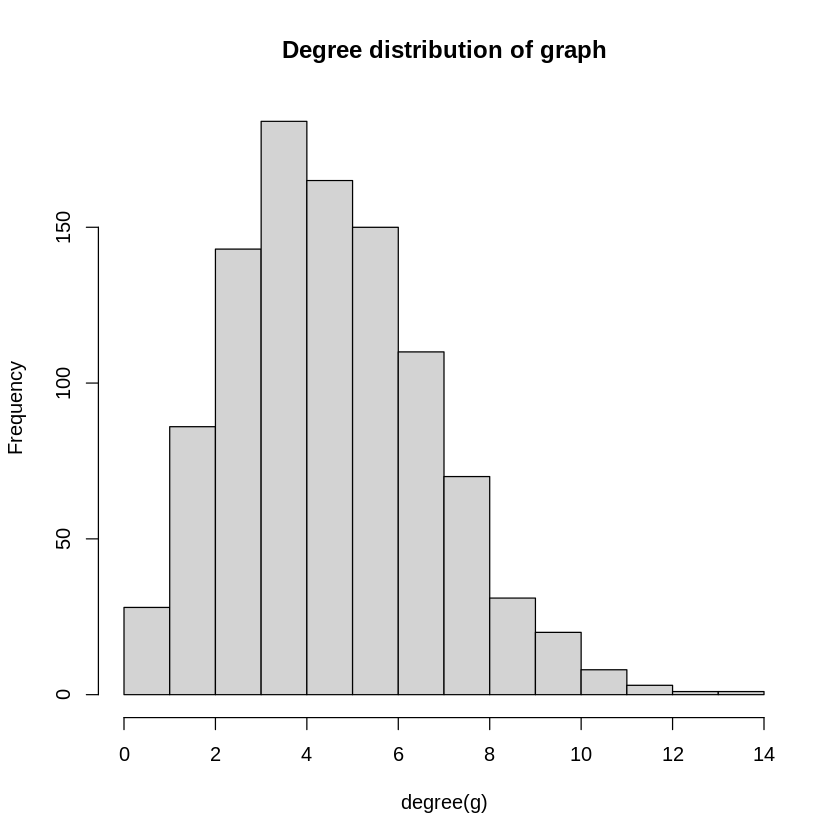

In [ ]:
# Question 2.1c
hist(degrees, main="Degree distribution of the nodes reached by random walk")
hist(degree(g), main = "Degree distribution of graph")

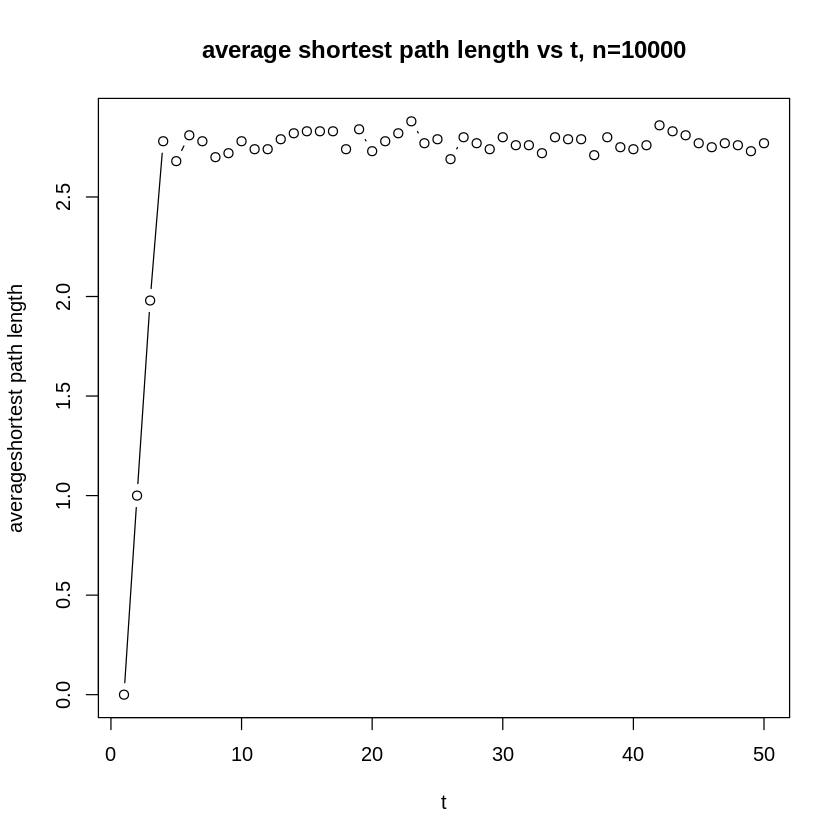

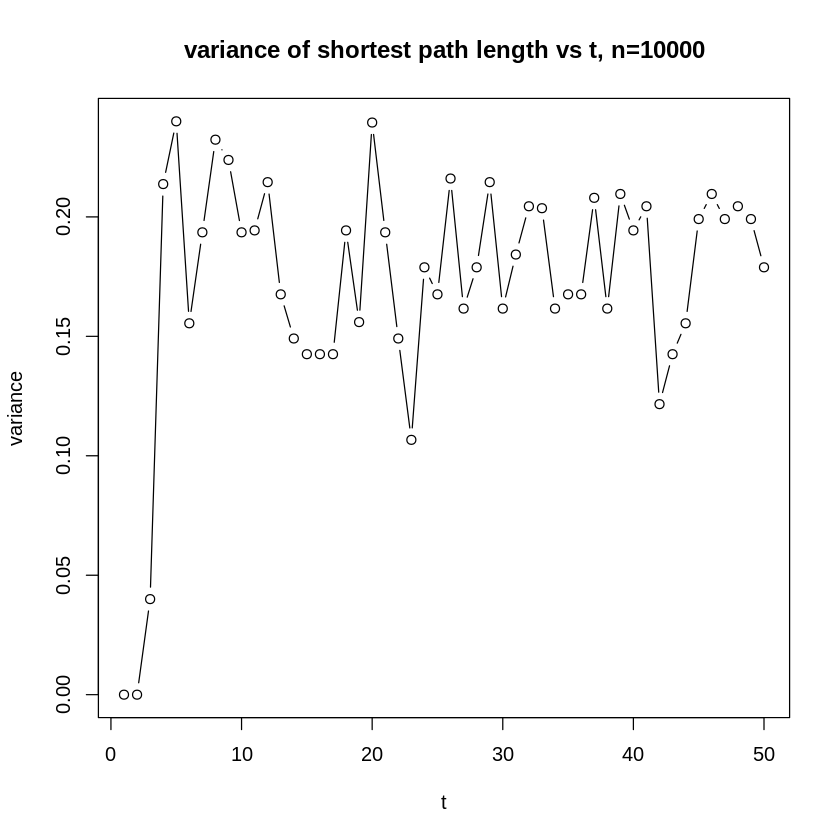

In [151]:
# Question 2.1d

distances <- c()
degrees <- c()

for (i in 1:100) {
  g <- sample_gnp(10000, 0.005) 
  cluster <- clusters(g)
  gcc <-induced.subgraph(g, which(cluster$membership==which.max(cluster$csize)))
  nodes = random_walk(gcc, steps=50, sample(V(gcc), 1))
  distances <- c(distances, shortest.paths(gcc, nodes, nodes[1]))
  degrees <- c(degrees, degree(gcc, nodes[length(nodes)]))
}

arr <- array(distances, dim=c(50,100))
means <- c()
vars <- c()
for (i in 1:50) {
  row <- arr[i,]
  means <- c(means, mean(row))
  vars <- c(vars, var(row))
}
plot(1:50, means, main="average shortest path length vs t, n=10000", xlab="t", ylab="averageshortest path length", type = "b")
plot(1:50, vars,  main="variance of shortest path length vs t, n=10000", xlab="t", ylab="variance", type = "b")


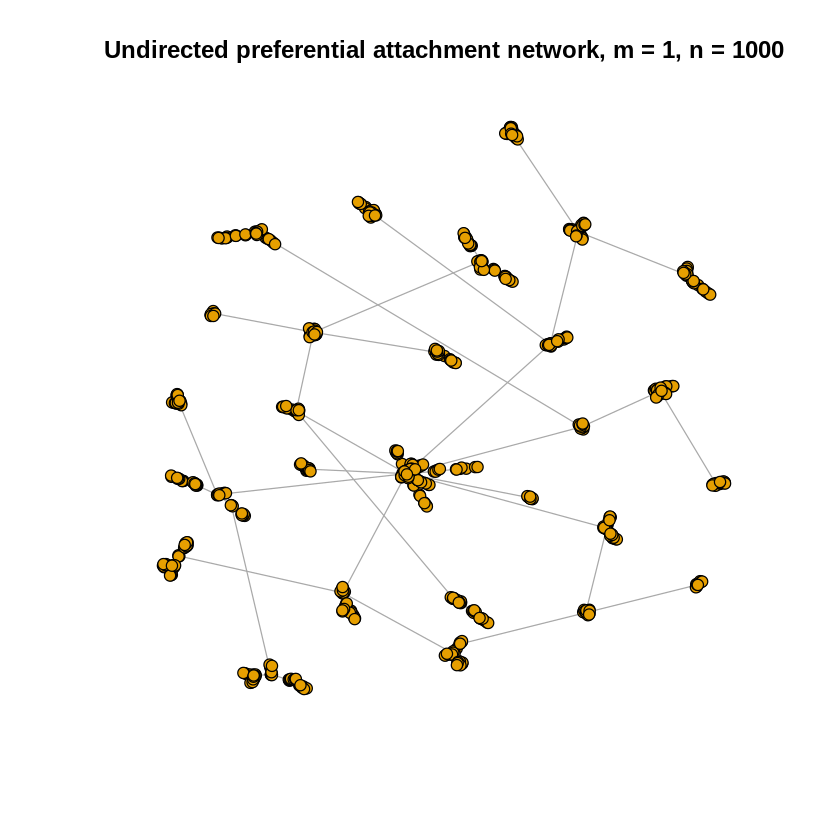

In [144]:
# Question 2.2a
g = sample_pa(n = 1000, m = 1, directed = FALSE)
plot(g, vertex.label=NA, vertex.size=4, main = "Undirected preferential attachment network, m = 1, n = 1000")


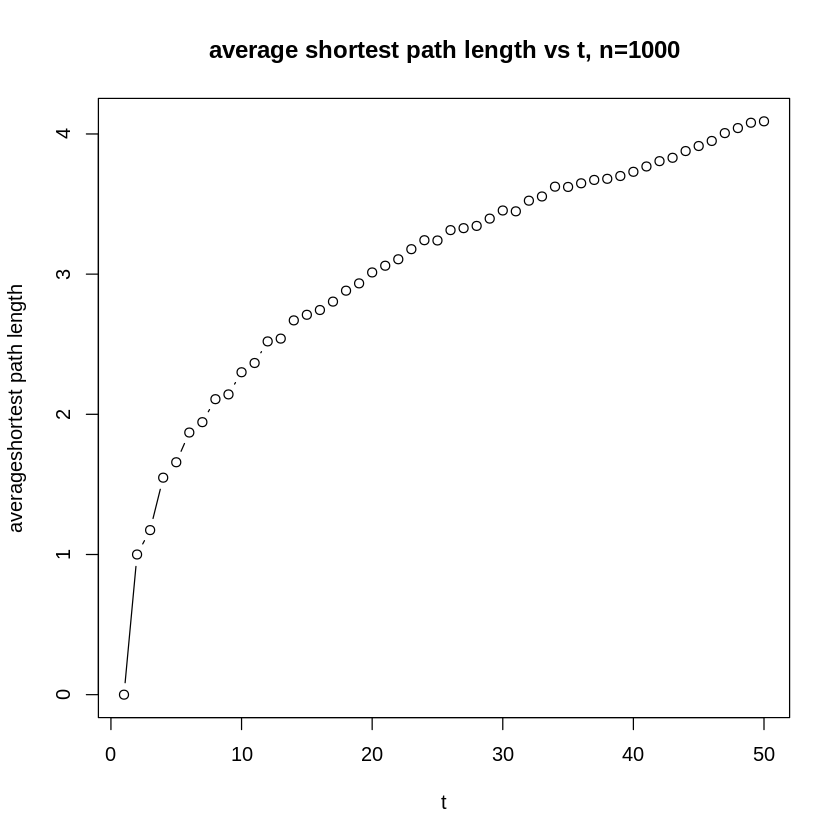

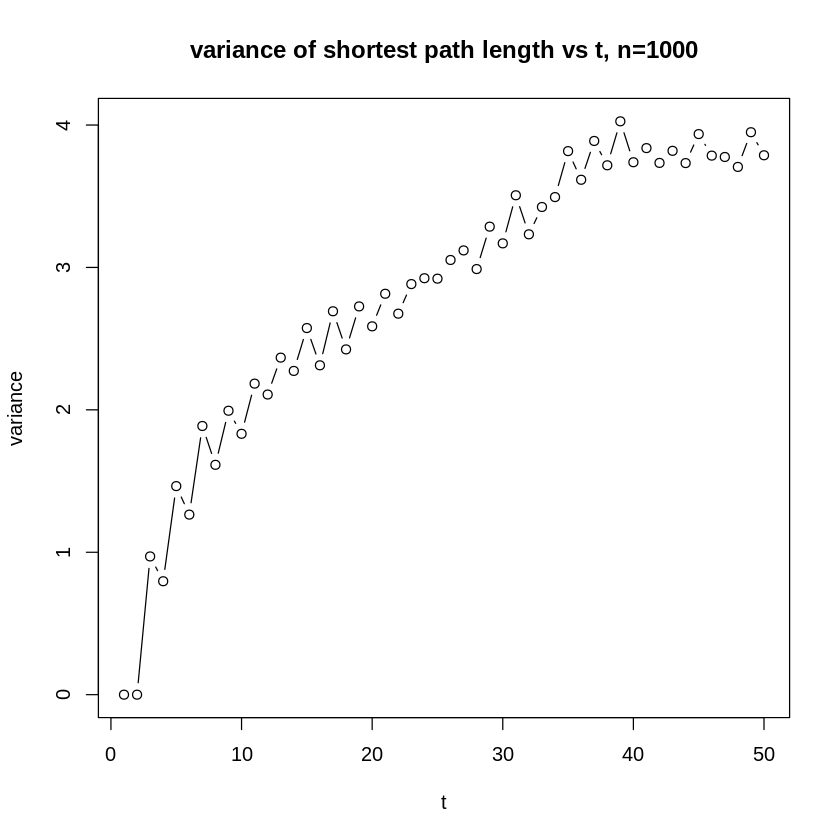

In [152]:
# Question 2.2b

distances <- c()
degrees <- c()

for (i in 1:1000) {
  g <- sample_pa(n = 1000, m = 1, directed = FALSE)
  cluster <- clusters(g)
  gcc <-induced.subgraph(g, which(cluster$membership==which.max(cluster$csize)))
  nodes = random_walk(gcc, steps=50, sample(V(gcc), 1))
  distances <- c(distances, shortest.paths(gcc, nodes, nodes[1]))
  degrees <- c(degrees, degree(gcc, nodes[length(nodes)]))
}

arr <- array(distances, dim=c(50,1000))
means <- c()
vars <- c()
for (i in 1:50) {
  row <- arr[i,]
  means <- c(means, mean(row))
  vars <- c(vars, var(row))
}
plot(1:50, means, main="average shortest path length vs t, n=1000", xlab="t", ylab="averageshortest path length", type = "b")
plot(1:50, vars,  main="variance of shortest path length vs t, n=1000", xlab="t", ylab="variance", type = "b")


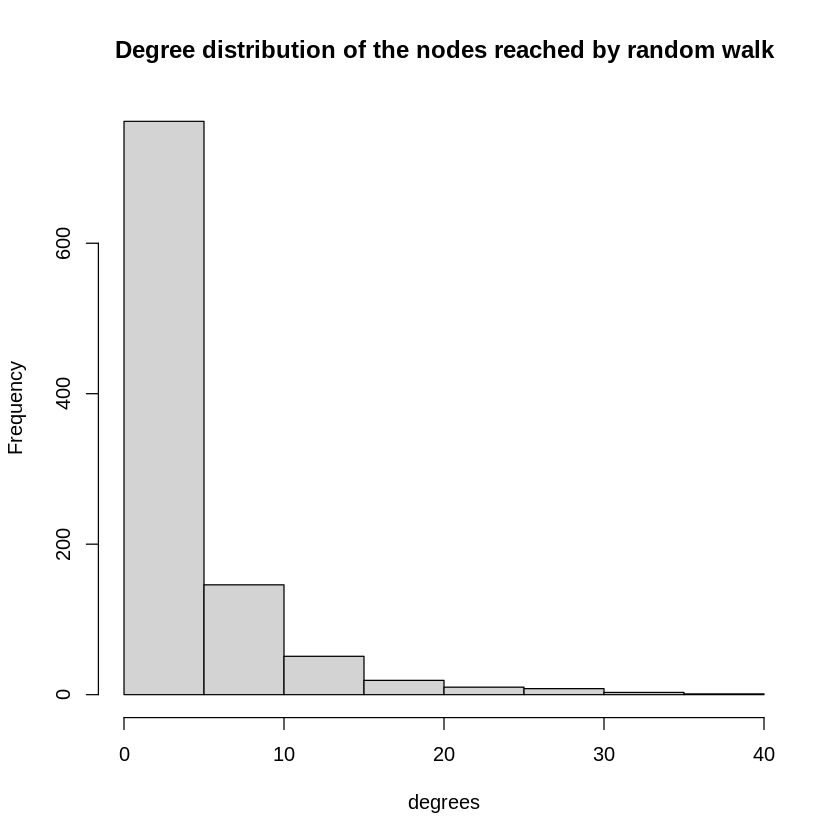

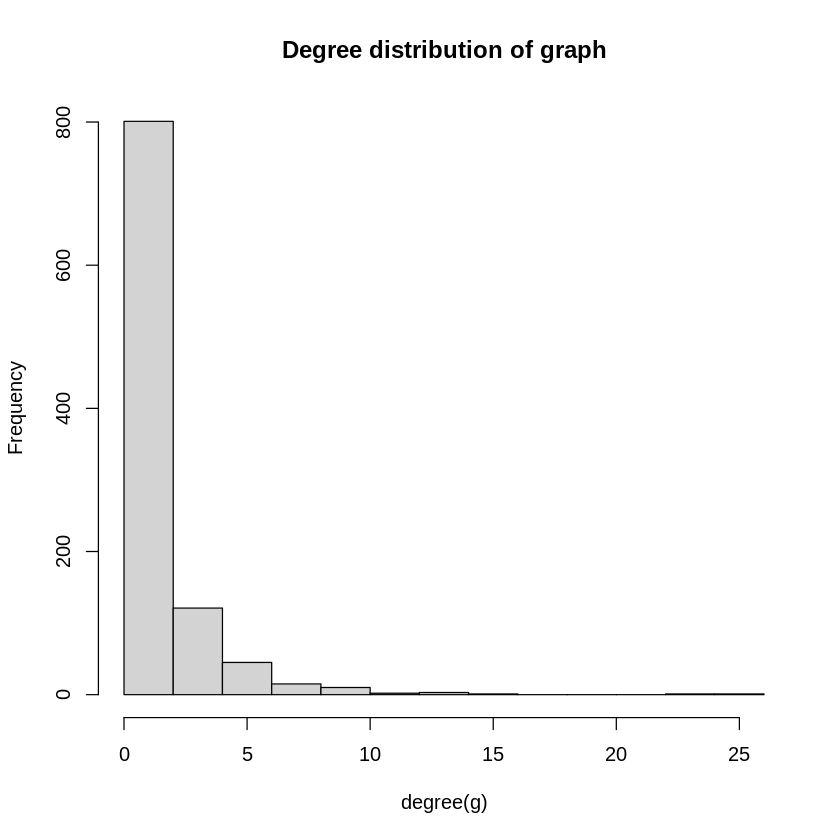

In [146]:
# Question 2.2c
hist(degrees, main="Degree distribution of the nodes reached by random walk")
hist(degree(g), main = "Degree distribution of graph")

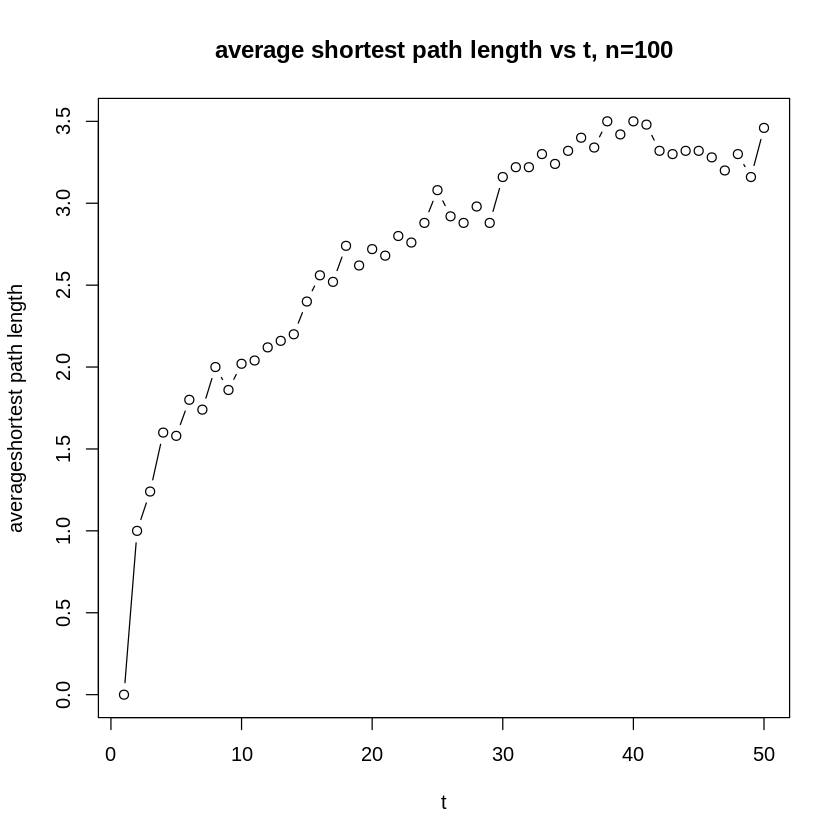

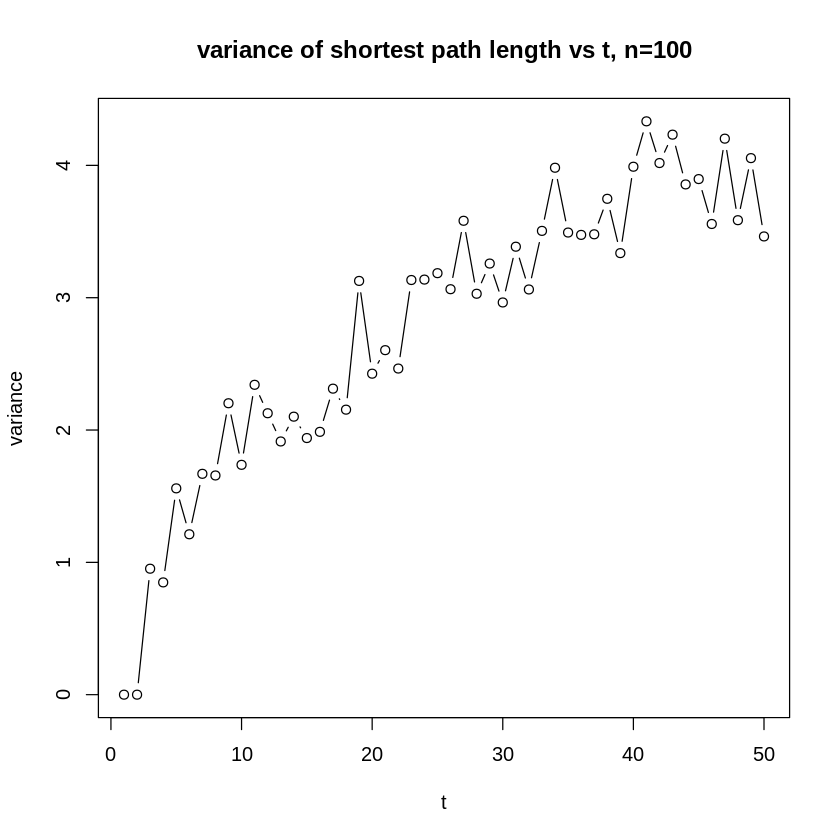

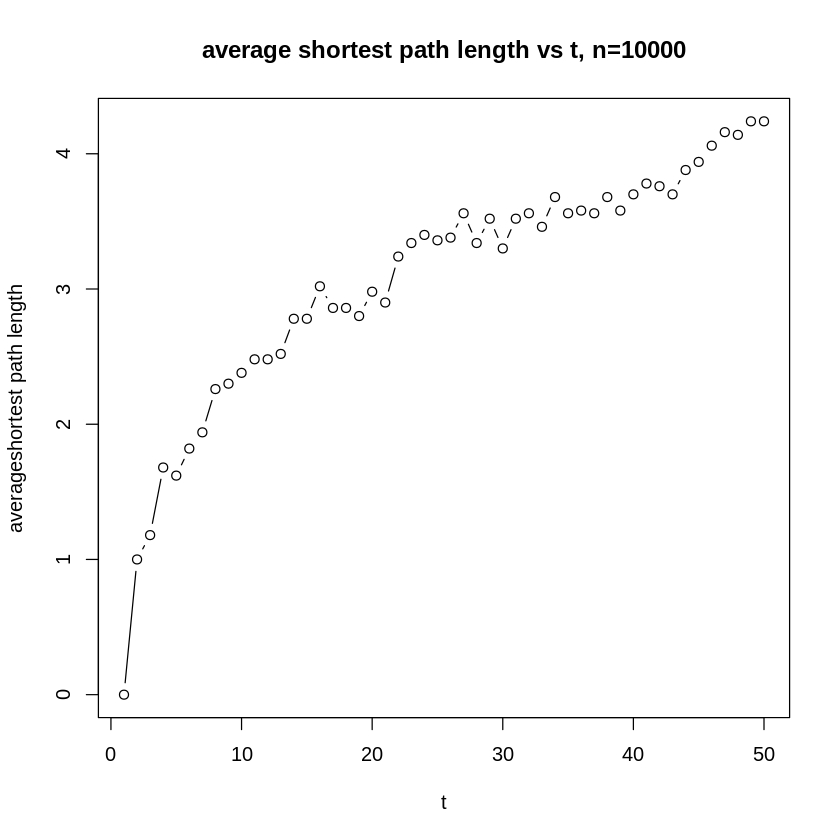

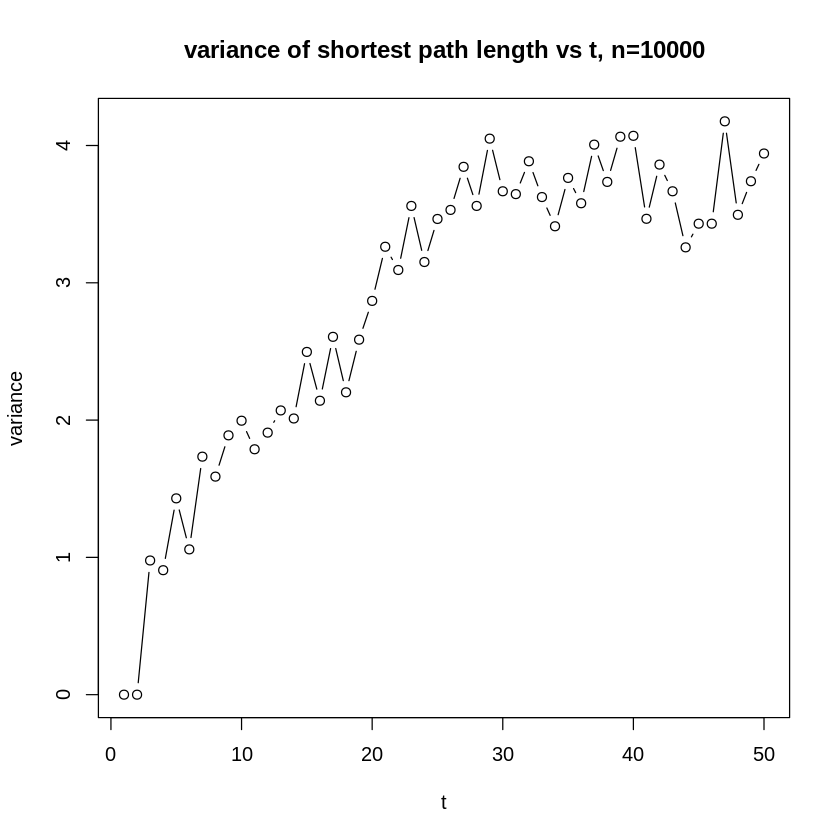

In [153]:
# Question 2.2d


distances <- c()
degrees <- c()

for (i in 1:100) {
  g <- sample_pa(n = 100, m = 1, directed = FALSE)
  cluster <- clusters(g)
  gcc <-induced.subgraph(g, which(cluster$membership==which.max(cluster$csize)))
  nodes = random_walk(gcc, steps=50, sample(V(gcc), 1))
  distances <- c(distances, shortest.paths(gcc, nodes, nodes[1]))
  degrees <- c(degrees, degree(gcc, nodes[length(nodes)]))
}

arr <- array(distances, dim=c(50,100))
means <- c()
vars <- c()
for (i in 1:50) {
  row <- arr[i,]
  means <- c(means, mean(row))
  vars <- c(vars, var(row))
}
plot(1:50, means, main="average shortest path length vs t, n=100", xlab="t", ylab="averageshortest path length", type = "b")
plot(1:50, vars,  main="variance of shortest path length vs t, n=100", xlab="t", ylab="variance", type = "b")

distances <- c()
degrees <- c()

for (i in 1:100) {
  g <- sample_pa(n = 10000, m = 1, directed = FALSE)
  cluster <- clusters(g)
  gcc <-induced.subgraph(g, which(cluster$membership==which.max(cluster$csize)))
  nodes = random_walk(gcc, steps=50, sample(V(gcc), 1))
  distances <- c(distances, shortest.paths(gcc, nodes, nodes[1]))
  degrees <- c(degrees, degree(gcc, nodes[length(nodes)]))
}

arr <- array(distances, dim=c(50,100))
means <- c()
vars <- c()
for (i in 1:50) {
  row <- arr[i,]
  means <- c(means, mean(row))
  vars <- c(vars, var(row))
}
plot(1:50, means, main="average shortest path length vs t, n=10000", xlab="t", ylab="averageshortest path length", type = "b")
plot(1:50, vars,  main="variance of shortest path length vs t, n=10000", xlab="t", ylab="variance", type = "b")